<div align="center">
    <h1>DS-210: Programming for Data Science</h1>
    <h1>Lecture 4</h1>
</div>


# More Git and Introduction to Rust: Compiling. Basic types and variables. Project manager (`cargo`).


# VSCode Rust Environment config

Make sure to have the following configuration for vscode on the environment

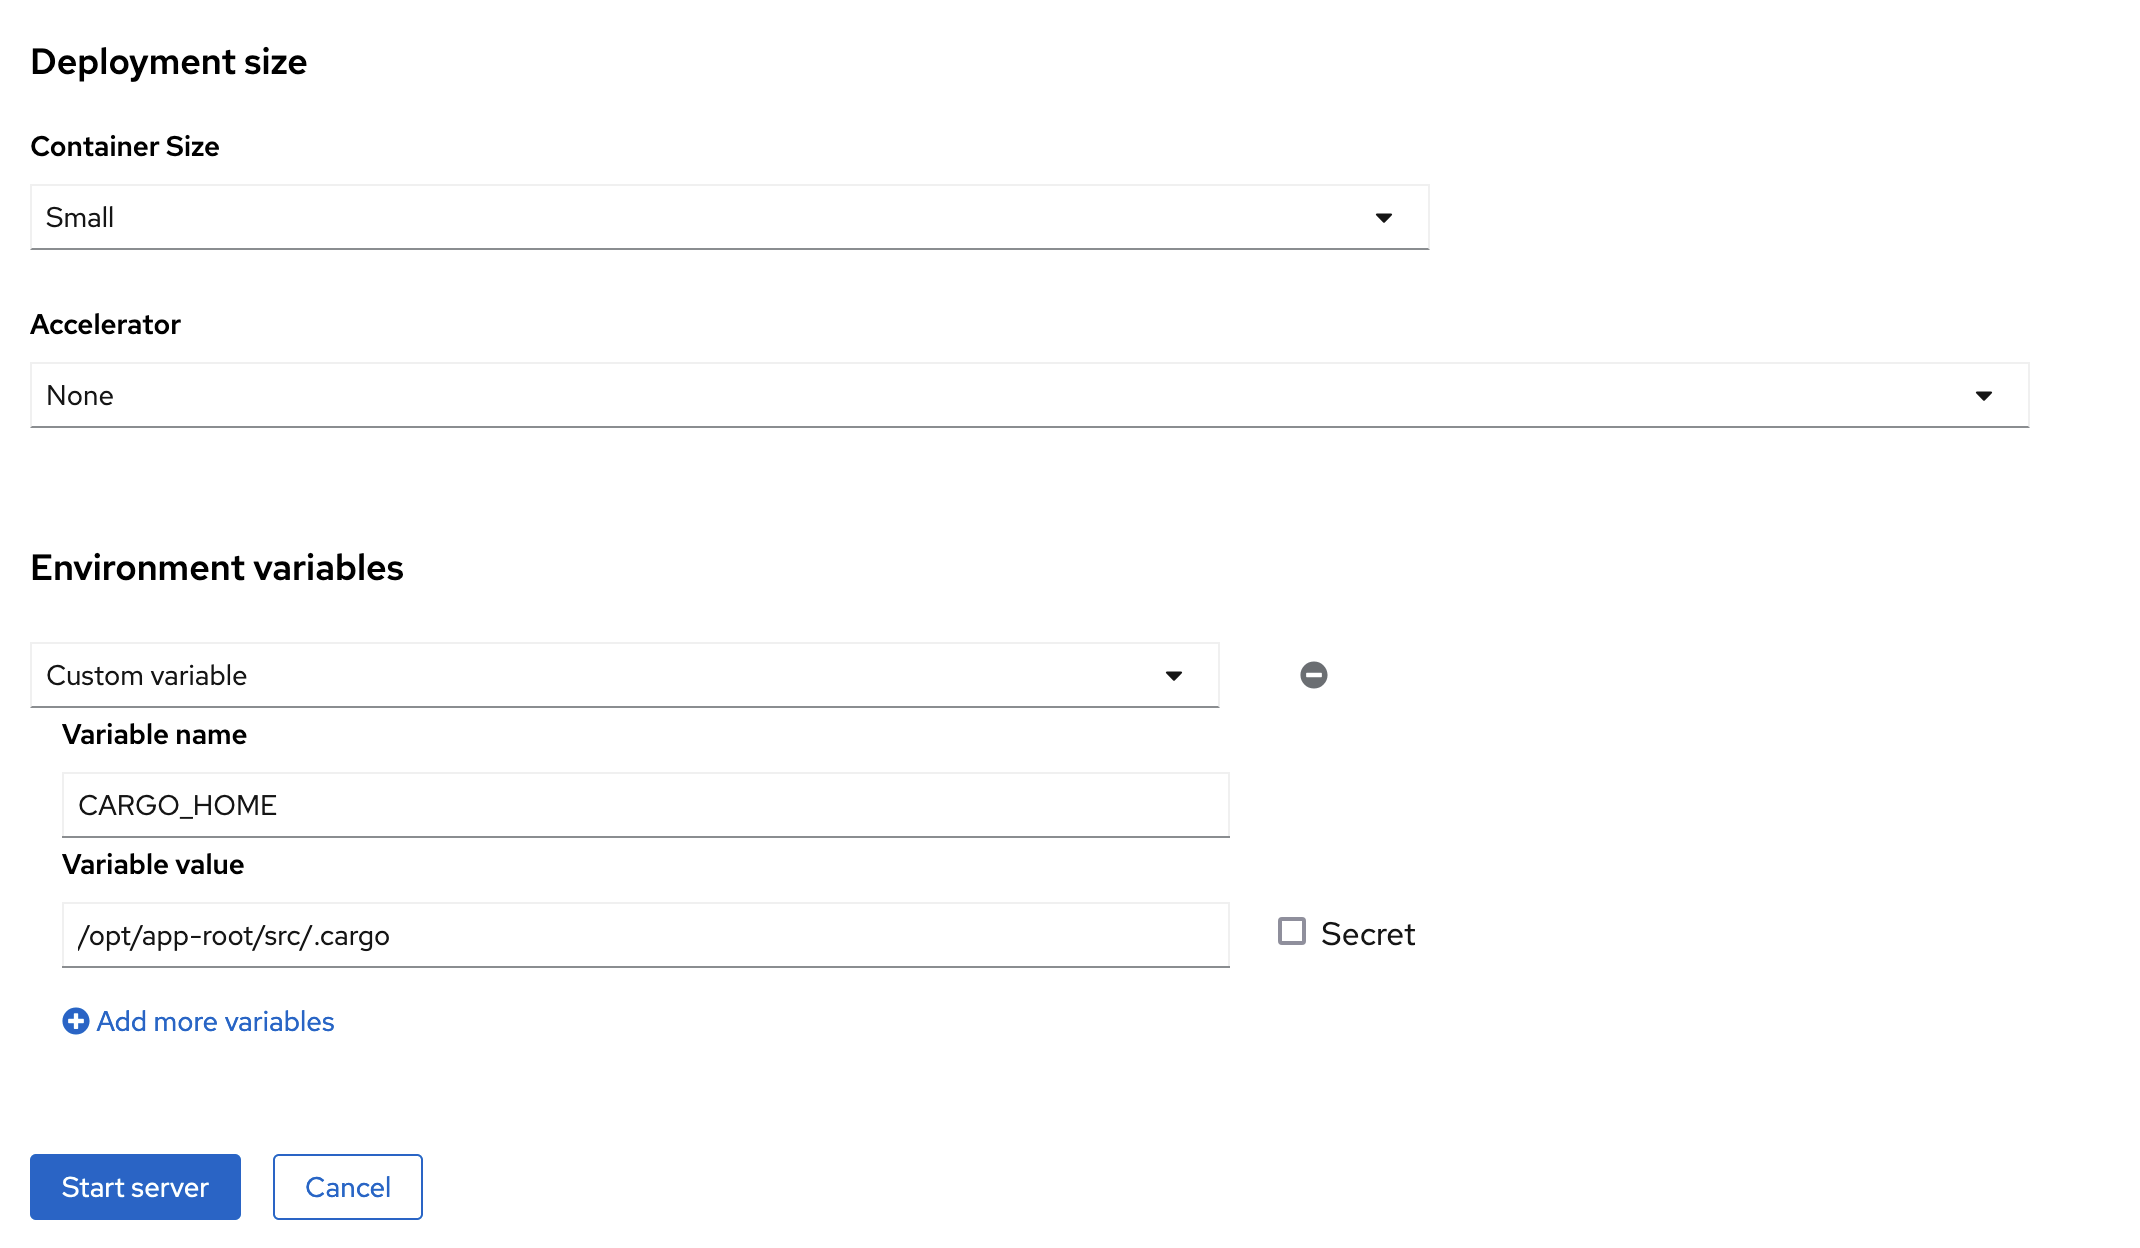

# Git



Free tool for source control.  Available at https://git-scm.com/downloads
Also integrated with VSCode (by default any VSCode project will be initialized as Git repository)

Some of the most common commands

* Some of the most useful commands:  
```
`> git --version #show the version`  
`> git init #initialize a local repository`  
`> git status #show the status of repository/branch`  
`> git add file or git add -A #add files to branch`  
`> git rm file # Delete files from branch`
`> git diff file # Show the differences between the current and pervious version
`> git commit -m "My first commit in the local repository" #Submit files to repository`   
`> git branch mynewbranch #Make a new branch`  
`> git checkout mynewbranch #switch to using the new branch`  
`# Now you can add and commit files in the new branch mynewbranch`  
`# You can move between branches using the checkout command`  
`> git checkout main; git merge mynewbranch; git branch -d mynewbranch #Merge branch with master and delete it`  
`# Conflicts can arise when merging branches.  You may need to resolve them using an editor`  
`> git log # See what commits exist in your repository`  
`> git checkout old_commit_number # Go back to an older version`  
`> git remote add origin https://github.com/kthanasi-git/My-new-repo #Add a non-local origin for safety`  
`> git push --set-upstream origin main #push our current local repository to origin`  
`> git fetch origin #Fetch from origin to local repository` 
`> git merge origin/main #Merge origin to main`  
`> git pull origin #Fetch and merge in a single operation`  
`> git push origin #Push to origin after having made local changes`  
`> git clone url # Create a local copy of a git internet repository`
```

* You can read a lot more at https://git-scm.com/ or https://www.w3schools.com/git/  

## Git Detailed demo

### Install Git-it from https://github.com/jlord/git-it-electron/releases 

and let's follow through

Other useful links:

 - https://docs.github.com/en/authentication/connecting-to-github-with-ssh/generating-a-new-ssh-key-and-adding-it-to-the-ssh-agent#adding-your-ssh-key-to-the-ssh-agent
 - https://docs.github.com/en/authentication/connecting-to-github-with-ssh/adding-a-new-ssh-key-to-your-github-account

# Rust: Compiling. Basic types and variables. Project manager (`cargo`).

## Source of Truth
* https://doc.rust-lang.org/stable/book/

## Write and compile simple Rust program

In [3]:
// A bunch of the output routines
fn main() {
    let x = 9;
    let y = 16;
    print!("Hello, DS210!\n");
    println!("Hello, DS210!\n");
    println!("{} plus {} is {}\n", x, y, x+y);
    println!("{:?} plus {:?} is {:?}\n", x, y, x+y);
    println!("{:X} plus {:X} is {:X}\n", x, y, x+y);
    let z = format!("{} plus {} is {}\n", x, y, x+y);
    println!("{}", z);  
    eprint!("E {} plus {} is {}\n", x, y, x+y);      
    eprintln!("E {} plus {} is {}\n", x, y, x+y);   
}

In [4]:
main();

Hello, DS210!
Hello, DS210!

9 plus 16 is 25

9 plus 16 is 25

9 plus 10 is 19

9 plus 16 is 25



E 9 plus 16 is 25
E 9 plus 16 is 25



```
// And some input routines
// Unfortunately jupyter notebook does not have support for reading from the terminal with Rust at this point.
// So this is for demo purposes
use std::io;
use std::io::Write;

fn main() {
    let mut user_input = String::new();
    print!("enter input: ");
    io::stdout().flush().expect("Error flushing");
    io::stdin().read_line(&mut user_input);
    println!("input was: {}", user_input);
}
```

**A few facts:**
* function `main`: the code that is executed
* `println!` is a macro:
   - first parameter is a format string
   - `{}` are replaced by the following parameters

**Simplest way to compile:**
  * put the content in file `hello.rs`
  * command line:
    - navigate to this folder
    - `rustc hello.rs`
    - run `./hello` or `hello.exe`

## Variable definitions

* By default immutable!

In [5]:
let x = 3;
x = x + 1; // <== error here
x

Error: cannot assign twice to immutable variable `x`

* Use `mut` to make them mutable

In [7]:
// mutable variable
let mut x = 3;
x = x + 1;
x = 9.5;
x

Error: mismatched types

* Variable shadowing: new variable with the same name

In [8]:
let solution = "4";
let solution : i32 = solution.parse()
                     .expect("Not a number!");
let solution = solution * (solution - 1) / 2;
println!("solution = {}",solution);
let solution = "This is a string";
println!("solution = {}", solution);

solution = 6
solution = This is a string


### You can gloss over this one for now as we will revisit it again
```
    a: &T      // immutable binding of immutable reference
mut a: &T      // mutable binding of immutable reference
    a: &mut T  // immutable binding of mutable reference
mut a: &mut T  // mutable binding of mutable reference
```

## Basic types: integers and floats

* unsigned integers: `u8`, `u16`, `u32`, `u64`, `u128`, `usize` (architecture specific size)
   - from $0$ to $2^n-1$
* signed integers: `i8`, `i16`, `i32` (default), `i64`, `i128`, `isize` (architecture specific size)
   - from $-2^{n-1}$ to $2^{n-1}-1$

(if you need to convert, use the `as` operator)

| Number literals |	Example |
| :-: | :-:|
| Decimal | 98_222 |
| Hex | 0xff |
| Octal | 0o77 |
| Binary | 0b1111_0000 |
| Byte (u8 only) | b'A' |

In [9]:
let s1 = 2_55_i32;
let s2 = 0xf_f;
let s3 = 0o3_77;
let s4 = 0b1111_1111;
println!("{} {} {} {}", s1, s2, s3, s4);

255 255 255 255


In [10]:
println!("U8 min is {} max is {}", u8::MIN, u8::MAX);
println!("I8 min is {} max is {}", i8::MIN, i8::MAX);
println!("U16 min is {} max is {}", u16::MIN, u16::MAX);
println!("I16 min is {} max is {}", i16::MIN, i16::MAX);
println!("U32 min is {} max is {}", u32::MIN, u32::MAX);
println!("I32 min is {} max is {}", i32::MIN, i32::MAX);
println!("U64 min is {} max is {}", u64::MIN, u64::MAX);
println!("I64 min is {} max is {}", i64::MIN, i64::MAX);
println!("U128 min is {} max is {}", u128::MIN, u128::MAX);
println!("I128 min is {} max is {}", i128::MIN, i128::MAX);
println!("USIZE min is {} max is {}", usize::MIN, usize::MAX);
println!("ISIZE min is {} max is {}", isize::MIN, isize::MAX);

U8 min is 0 max is 255
I8 min is -128 max is 127
U16 min is 0 max is 65535
I16 min is -32768 max is 32767
U32 min is 0 max is 4294967295
I32 min is -2147483648 max is 2147483647
U64 min is 0 max is 18446744073709551615
I64 min is -9223372036854775808 max is 9223372036854775807
U128 min is 0 max is 340282366920938463463374607431768211455
I128 min is -170141183460469231731687303715884105728 max is 170141183460469231731687303715884105727
USIZE min is 0 max is 18446744073709551615
ISIZE min is -9223372036854775808 max is 9223372036854775807


In [11]:
let x : i16 = 13;
let y : i32 = -17;
// won't work without the conversion
println!("{}", (x as i32)* y);

-221


* floats: `f32` and `f64` (default)
* There is talk about adding f128 to the language but it is not as useful as u128/i128.

In [12]:
let x:f32 = 4.0;
// let x:f32 = 4; // Will not work.  It will not autoconvert for you.
let z = 1.25; // default float type: f64
// won't work without the conversion
(x as f64) * z

5.0

### Why 128 bit integers but not floats? AES128 (and AES192, AES256)

The first key-recovery attacks on full AES were by Andrey Bogdanov, Dmitry Khovratovich, and Christian Rechberger, and were published in 2011.[25] The attack is a biclique attack and is faster than brute force by a factor of about four. It requires 2126.2 operations to recover an AES-128 key. For AES-192 and AES-256, 2190.2 and 2254.6 operations are needed, respectively. This result has been further improved to 2126.0 for AES-128, 2189.9 for AES-192 and 2254.3 for AES-256,[26] which are the current best results in key recovery attack against AES.

This is a very small gain, as a 126-bit key (instead of 128-bits) would still take billions of years to brute force on current and foreseeable hardware. Also, the authors calculate the best attack using their technique on AES with a 128-bit key requires storing 288 bits of data. That works out to about 38 trillion terabytes of data, which is more than all the data stored on all the computers on the planet in 2016. As such, there are no practical implications on AES security.[27] The space complexity has later been improved to 256 bits,[26] which is 9007 terabytes (while still keeping a time complexity of 2126.2).



In [6]:
println!("F32 min is {} max is {}", f32::MIN, f32::MAX);
println!("F64 min is {} max is {}", f64::MIN, f64::MAX);


F32 min is -340282350000000000000000000000000000000 max is 340282350000000000000000000000000000000
F64 min is -179769313486231570000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 max is 179769313486231570000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000


## Basic types: Booleans, characters, and strings

* `bool` uses one byte of memory

In [15]:
let x = true;
let y: bool = false;

// x and (not y)
println!("{}", x & y);
println!("{}", x | y);
println!("{}", x && y);
println!("{}", x || y);
println!("{}", !y);


false
true
false
true
true


In [4]:
let x = 10;
let y = 7;
println!("{}", x & y);
println!("{}", x | y);
// println!("{}", x && y);
// println!("{}", x || y);
println!("{}", !y);



2
15
-8


* `char` defined via single quote, uses four bytes of memory (Unicode scalar value)
* For a complete list of UTF-8 characters check https://www.fileformat.info/info/charset/UTF-8/list.htm

In [17]:
let x: char = 'a';
let y = '🚦';
let z = '🦕';

println!("{} {} {}", x, y, z);

a 🚦 🦕


* string slice defined via double quotes (not so basic actually!)

In [18]:
fn testme() {
    let s1 = "Hello! How are you, 🦕?";
    let s2 : &str = "Καλημέρα από την Βοστώνη και την DS210";
    // This doesn't work.  You can't do String = &str but you can do the opposite
    // let s3: String = "Does this work?";
    let s3: String = String::from("Does this work?");
    let s4: &str = &s3;
    println!("{} {} {} {}", s1, s2, s3, s4);
    // println!("{}", s1[3]);
    // println!("{}", s2[3]);
    println!("{}", s1.chars().nth(3).unwrap());
    println!("{}", s2.chars().nth(3).unwrap());
}

testme();

Hello! How are you, 🦕? Καλημέρα από την Βοστώνη και την DS210 Does this work? Does this work?
l
η


## Project manager: `cargo`

* create a project: `cargo new PROJECT-NAME`
* main file will be `PROJECT-NAME/src/main.rs`

* to run: `cargo run`
* to just build: `cargo build`

Add `--release` to create a "fully optimized" version:
 * longer compilation
 * faster execution
 * some runtime checks not included (e.g., integer overflow)
 * debuging information not included
 * the executable in a different folder
 * Demo fibonacci on the terminal

## Project manager: `cargo`

If you just want to **check** if your current version compiles: `cargo check`
  * Much faster for big projects

## Read book chapter 1 and sections 3.1 and 3.2